<a href="https://colab.research.google.com/github/JonaBaron/TensorFlow/blob/main/08_NLP_Fundamentals_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to NLP Fundamentals in TensorFlow


In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-40GB (UUID: GPU-32de1db0-94f5-6be0-0c4e-dc5b9277f1dd)


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

--2025-01-20 15:56:35--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2025-01-20 15:56:35 (117 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## Get a text dataset

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

# Unzip data
unzip_data("nlp_getting_started.zip")

--2025-01-20 15:56:40--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   695KB/s    in 0.9s    

2025-01-20 15:56:42 (695 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

,count
target,
0,4342
1,3271


In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5) # create random indexes not higher than the total number of samples
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real diaster)" if target > 0 else "(not real diaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real diaster)
Text:
Only been back 10 &amp; a whirlwind has hit jaiden started open his present straight away didn't even get chance get in &amp; sit down lol

---

Target: 0 (not real diaster)
Text:
@GoP establishment is working overtime to derail #DONZILLA... @realDonaldTrump #Trump2016  https://t.co/XVaOQo4EgR

---

Target: 0 (not real diaster)
Text:
@kaputt21 Hamburg Police Chief Gregory Wickett has told 7 Eyewitness News he 'can't confirm or deny' an investigation is underway.

---

Target: 0 (not real diaster)
Text:
Block the plate with a charging Schwarber coming down the line Cervelli. I dare you. You would explode into a little puff of smoke

---

Target: 1 (real diaster)
Text:
@SarniamakChris @Hromadske @kasiadear33  how silly that one of only two countries that can destroy the world has a say about world security

---



### Split data into training and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size=0.1, # use 10% of training data for validation split
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

### Text vectorization (tokenization)

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None)

In [ ]:
len(train_sentences[0].split())

7

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer instance to the training data using the adapt() method
text_vectorizer.adapt(train_sentences)

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Pandemonium In Aba As Woman Delivers Baby Without Face (Photos) - http://t.co/c5u9qsySeJ        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 502,    4, 1157,   26,  410, 1146,  469,  228,  289,  729,    1,
           0,    0,    0,    0]])>

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # the most common words in the vocab
bottom_5_words = words_in_vocab[-5:] # the least common words in the vocab
print(f"Most common words in vocab: {top_5_words}")
print(f"Least common words in vocab: {bottom_5_words}")

Most common words in vocab: ['', '[UNK]', 'the', 'a', 'in']
Least common words in vocab: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [ ]:
# how long is our vocab?
len(words_in_vocab)

10000

## Creating an Embedding using an Embedding Layer

In [ ]:
max_length,

(15,)

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set the input shape
                             output_dim=128, # set the size of the embedding vector
                             embeddings_initializer="uniform", # default, initialize embedding vectors randomly
                             input_length=max_length # how long is each input
                             )

embedding

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


<Embedding name=embedding, built=False>

In [ ]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into numerical representation, aka tokenization first)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
Stuart Broad Takes Eight Before Joe Root Runs Riot Against Aussies        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0007717 , -0.0328478 ,  0.01548186, ..., -0.04214636,
          0.01920284,  0.02888587],
        [ 0.03677093, -0.01868736, -0.0131644 , ...,  0.03423903,
         -0.01247895,  0.04308497],
        [ 0.04457455, -0.00065112, -0.03536529, ..., -0.01545714,
          0.01611325, -0.01672462],
        ...,
        [ 0.0470691 , -0.00922899, -0.00355288, ...,  0.0258376 ,
          0.0215747 , -0.02755385],
        [ 0.0470691 , -0.00922899, -0.00355288, ...,  0.0258376 ,
          0.0215747 , -0.02755385],
        [ 0.0470691 , -0.00922899, -0.00355288, ...,  0.0258376 ,
          0.0215747 , -0.02755385]]], dtype=float32)>

In [ ]:
sample_embed[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.0007717 , -0.0328478 ,  0.01548186,  0.02318886,  0.03703538,
       -0.03576029, -0.03648841, -0.00863511,  0.04519096, -0.01700816,
       -0.03839878, -0.03300686,  0.04556474,  0.00245257,  0.02774015,
       -0.04370861,  0.04886457,  0.03180673, -0.04975012, -0.03846061,
       -0.01618708,  0.03674291, -0.0398543 , -0.03615107, -0.03097961,
        0.03357439, -0.02488267,  0.00639104, -0.02601299, -0.01480214,
        0.03909782,  0.03403652, -0.02688851, -0.0122357 , -0.00053123,
        0.01125672, -0.03061074, -0.02864964, -0.02846336, -0.03879054,
        0.04506116,  0.02794527,  0.01727546,  0.02257476,  0.03442189,
       -0.01631977,  0.04672286, -0.00053098, -0.04166543, -0.00378623,
       -0.01101403,  0.04021185,  0.01990472,  0.03516689, -0.03950988,
        0.04913206, -0.04656973, -0.0069884 , -0.03458586, -0.04769825,
       -0.04072479,  0.00256854,  0.04262966, -0.00241294, -0.04589186,
        0.043245

## Models

* Model 0: Naive Bayes
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional LSTM
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Word Embedding
* Model 7: Same as model 6 but using 10% of data


In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
                    ("clf", MultinomialNB()) # model the text converted to numbers
])

# Fit the pipeline to the training data
model_0.fit(train_sentences, train_labels)

CPU times: user 163 ms, sys: 7.93 ms, total: 171 ms
Wall time: 193 ms


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Let's evalaute our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments


In [ ]:
# Function to evalaute: accuracy, precision, recall, F1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  ----
  y_true = true labels in the form of a 1D array
  y_pred = predicted label in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall and f1-score between y_true and y_pred.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100 # get accuracy score in percentage value
  # Calculate model precision, recall and f1 score using "weighted" avergage
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  # Create a dictionary of model results
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1

In [ ]:
# Create tensorboard callback (need to create a new one for each model)
from helper_functions import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [ ]:
train_sentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [ ]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings
x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense") # construct the model

In [ ]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20250120-155646
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6359 - loss: 0.6483 - val_accuracy: 0.7572 - val_loss: 0.5319
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8263 - loss: 0.4526 - val_accuracy: 0.7887 - val_loss: 0.4711
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8652 - loss: 0.3480 - val_accuracy: 0.7861 - val_loss: 0.4579
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8962 - loss: 0.2841 - val_accuracy: 0.7900 - val_loss: 0.4684
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9203 - loss: 0.2272 - val_accuracy: 0.7861 - val_loss: 0.4786


In [ ]:
# Evaluate model 1
model_1.evaluate(val_sentences, val_labels)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7802 - loss: 0.5115 


[0.47860029339790344, 0.7860892415046692]

In [ ]:
# Make predictions with model_1
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[0.35108814],
       [0.77623105],
       [0.997413  ],
       [0.09366521],
       [0.12201549],
       [0.92892295],
       [0.9281713 ],
       [0.9925856 ],
       [0.9663817 ],
       [0.22317658]], dtype=float32)

In [ ]:
# Convert model_1 pred probs from probabilities to prediction labels
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
val_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
# Evaluate model_1 with our evaluation function
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds.cpu().numpy())
model_1_results

Instructions for updating:
Use tf.identity with explicit device placement instead.


{'accuracy': 78.60892388451444,
 'precision': 0.7907394181632303,
 'recall': 0.7860892388451444,
 'f1': 0.7831536805930754}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

In [ ]:
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

### Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model_1_dense"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,840,389 (14.65 MB)

 Trainable params: 1,280,129 (4.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,560,260 (9.77 MB)

In [ ]:
# Get the weight matrix of embedding layer
# (the weights are the numerical patterns between the text in the training dataset that the model has learned)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
import io

# Code to save trained embeddings to file - we got this from here: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Let's download the saved embeddings locally
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model 2: LSTM

long short-term memory


In [ ]:
# Create LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
print(f"After embedding: {x.shape}")
x = layers.LSTM(64, activation="tanh")(x)
print(f"After LSTM cell: {x.shape}")
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")


After embedding: (None, 15, 128)
After LSTM cell: (None, 64)


In [ ]:
# Compile
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_2 = model_2.fit(train_sentences,
                        train_labels,
                        epochs=5,
                        validation_data=(val_sentences, val_labels),
                        callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                               experiment_name="model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20250120-155655
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8928 - loss: 0.3035 - val_accuracy: 0.7690 - val_loss: 0.6729
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9480 - loss: 0.1454 - val_accuracy: 0.7848 - val_loss: 0.6549
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9566 - loss: 0.1188 - val_accuracy: 0.7848 - val_loss: 0.6948
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9632 - loss: 0.0959 - val_accuracy: 0.7835 - val_loss: 0.7034
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9630 - loss: 0.0945 - val_accuracy: 0.7730 - val_loss: 0.9597


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10]

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


((762, 1),
 array([[4.3978035e-02],
        [8.1450611e-01],
        [9.9981636e-01],
        [2.7701898e-02],
        [8.9834619e-04],
        [9.9918622e-01],
        [9.6605355e-01],
        [9.9986172e-01],
        [9.9976844e-01],
        [2.4015267e-01]], dtype=float32))

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_preds))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds.cpu().numpy())
model_2_results

{'accuracy': 77.29658792650919,
 'precision': 0.7763206990944375,
 'recall': 0.7729658792650919,
 'f1': 0.7701512125975899}

## Model 3: GRU


In [ ]:
# Build an RNN using the GRU cell
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64, activation="tanh")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

In [ ]:
# summary
model_3.summary()

Model: "model_3_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 64)                  │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,317,313 (5.03 MB)

 Trainable params: 1,317,313 (5.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20250120-155705
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8732 - loss: 0.2805 - val_accuracy: 0.7730 - val_loss: 0.7471
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9663 - loss: 0.0854 - val_accuracy: 0.7795 - val_loss: 0.8067
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9727 - loss: 0.0699 - val_accuracy: 0.7782 - val_loss: 0.9765
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9756 - loss: 0.0621 - val_accuracy: 0.7782 - val_loss: 1.0631
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9797 - loss: 0.0481 - val_accuracy: 0.7769 - val_loss: 1.2612


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10], model_3_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


(array([[9.6072061e-03],
        [7.4862152e-01],
        [9.9990511e-01],
        [5.6812912e-03],
        [1.2680545e-04],
        [9.9982566e-01],
        [9.8657125e-01],
        [9.9994874e-01],
        [9.9991393e-01],
        [5.2944589e-01]], dtype=float32),
 (762, 1))

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds.cpu().numpy())
model_3_results

{'accuracy': 77.69028871391076,
 'precision': 0.7767817074616054,
 'recall': 0.7769028871391076,
 'f1': 0.7760612229809302}

## Model 4: Bidirectional RNN model

In [ ]:
# Build a bidirectional RNN in TensorFlow
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_bidirectional")

In [ ]:
model_4.summary()

Model: "model_4_bidirectional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 128)                 │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,378,945 (5.26 MB)

 Trainable params: 1,378,945 (5.26 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_model_4 = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20250120-155714
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9232 - loss: 0.1995 - val_accuracy: 0.7664 - val_loss: 1.0135
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9738 - loss: 0.0610 - val_accuracy: 0.7690 - val_loss: 1.0344
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9793 - loss: 0.0505 - val_accuracy: 0.7717 - val_loss: 1.1256
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9799 - loss: 0.0437 - val_accuracy: 0.7664 - val_loss: 1.3490
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9803 - loss: 0.0447 - val_accuracy: 0.7717 - val_loss: 1.5170


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10], model_4_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


(array([[4.5706462e-02],
        [7.8637409e-01],
        [9.9999154e-01],
        [6.9421388e-02],
        [5.1956129e-05],
        [9.9991822e-01],
        [9.9847108e-01],
        [9.9999285e-01],
        [9.9999130e-01],
        [9.9828184e-01]], dtype=float32),
 (762, 1))

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_4_preds.cpu().numpy())
model_4_results

{'accuracy': 77.16535433070865,
 'precision': 0.7719163531646017,
 'recall': 0.7716535433070866,
 'f1': 0.7703995252204571}

## Model 5: Conv1D

In [ ]:

embedding_test = embedding(text_vectorizer(["this is a test sentence"])) # turn target sentence into embedding
conv_1d_layer = layers.Conv1D(filters=32,
                              kernel_size=5, #means it'll look at 5 words at a time
                              activation="relu")
conv_1d_output = conv_1d_layer(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)
print(f"Embedding output shape: {embedding_test.shape}")
print(f"Conv1D output shape: {conv_1d_output.shape}")
print(f"Max pool output shape: {max_pool_output.shape}")

Embedding output shape: (1, 15, 128)
Conv1D output shape: (1, 11, 32)
Max pool output shape: (1, 32)


In [ ]:
# the outputs
print(f"Embedding output: {embedding_test}")
print(f"Conv1D output: {conv_1d_output}")
print(f"Max pool output: {max_pool_output}")

Embedding output: [[[ 0.04498661 -0.01496451  0.00208945 ...  0.01866833  0.06263372
    0.07033359]
  [ 0.02801823  0.02414394  0.08004317 ...  0.01984547 -0.0140256
    0.05400011]
  [ 0.0723599  -0.05657043  0.00127983 ... -0.0712432   0.04617102
    0.01433565]
  ...
  [ 0.13074943  0.03267062 -0.01257688 ... -0.01800108 -0.00569926
   -0.01333309]
  [ 0.13074943  0.03267062 -0.01257688 ... -0.01800108 -0.00569926
   -0.01333309]
  [ 0.13074943  0.03267062 -0.01257688 ... -0.01800108 -0.00569926
   -0.01333309]]]
Conv1D output: [[[0.02348265 0.         0.         0.04230343 0.01667732 0.02781523
   0.         0.02609086 0.         0.00853886 0.         0.05380192
   0.         0.         0.01238946 0.00200133 0.06672947 0.
   0.02038306 0.         0.02780697 0.         0.07724963 0.10249813
   0.07473402 0.         0.02200857 0.05013926 0.08439562 0.01278304
   0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.02789633 0.         0.00131814 0.

In [ ]:
# Create 1-dimensional CNN to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation="relu")(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation="sigmoid", name="output_layer")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_conv1d")

model_5.summary()

Model: "model_5_conv1d"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization_1                 │ (None, 15)                  │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 15, 128)             │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 11, 32)              │          20,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d_1               │ (None, 32)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,300,545 (4.96 MB)

 Trainable params: 1,300,545 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
BATCH_SIZE = 32

In [ ]:
# Compile
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit
history_model_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              batch_size=BATCH_SIZE,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_5_conv1d")])

Saving TensorBoard log files to: model_logs/model_5_conv1d/20250120-155727
Epoch 1/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9344 - loss: 0.1917 - val_accuracy: 0.7703 - val_loss: 0.8990
Epoch 2/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9742 - loss: 0.0712 - val_accuracy: 0.7677 - val_loss: 1.0073
Epoch 3/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9806 - loss: 0.0591 - val_accuracy: 0.7559 - val_loss: 1.1529
Epoch 4/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9822 - loss: 0.0465 - val_accuracy: 0.7480 - val_loss: 1.1998
Epoch 5/5
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9808 - loss: 0.0463 - val_accuracy: 0.7625 - val_loss: 1.2042


In [ ]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:5], model_5_pred_probs.shape

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


(array([[3.1702173e-01],
        [9.5404124e-01],
        [9.9994290e-01],
        [4.5146957e-02],
        [7.1722616e-07]], dtype=float32),
 (762, 1))

In [ ]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds.cpu().numpy())
model_5_results

{'accuracy': 76.24671916010499,
 'precision': 0.762420601385426,
 'recall': 0.7624671916010499,
 'f1': 0.7613223680610012}

## Model 6: TensorFlow Hub Pretrained Sentence Encoder



In [ ]:
sample_sentence

"There's a flood in my street!"

In [ ]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embed_samples = embed([sample_sentence,
                       "When you can the universal sentence encoder on a sentence, it turns it into numbers."])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01154496  0.02487099  0.0287963  -0.01272263  0.03969951  0.08829075
  0.02682647  0.05582222 -0.01078761 -0.00596655  0.00640638 -0.01816132
  0.0002885   0.09106605  0.05874373 -0.03175148  0.01510153 -0.05164852
  0.0099434  -0.06867751 -0.04210396  0.0267539   0.03008907  0.00320448
 -0.00336865 -0.04790529  0.02267517 -0.00984557 -0.04066692 -0.01285528
 -0.04665243  0.05630673 -0.03952145  0.00521895  0.02495948 -0.07011835
  0.02873133  0.04945794 -0.00634555 -0.08959357  0.02807156 -0.00809173
 -0.01363956  0.05998395 -0.1036155  -0.05192674  0.00232459 -0.02326531
 -0.03752431  0.0333298 ], shape=(50,), dtype=float32)


In [ ]:
embed_samples[0].shape

TensorShape([512])

In [ ]:
import keras
from keras.layers import Dense
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [ ]:
# Create model
model_6 = tf_keras.Sequential([
  sentence_encoder_layer,   # THIS LINE WAS MY PAINTFUL CODE with the mentioned error...
  tf_keras.layers.Dense(64, activation="relu"), # Use tf_keras.layers.Dense
  tf_keras.layers.Dense(1, activation="sigmoid", name="output_layer") # Use tf_keras.layers.Dense
], name="model_6_USE")

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.compat.v1.train.AdamOptimizer(),
                metrics=["accuracy"])

model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_7 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# fit
model_6_history = model_6.fit(train_sentences,
    train_labels,
    epochs=5,
    batch_size=32,  # Added explicit batch size
    validation_data=(val_sentences, val_labels))

Epoch 1/5
215/215 [==============================] - 5s 13ms/step - loss: 0.5091 - accuracy: 0.7889 - val_loss: 0.4496 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4161 - accuracy: 0.8154 - val_loss: 0.4374 - val_accuracy: 0.8136
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4019 - accuracy: 0.8237 - val_loss: 0.4311 - val_accuracy: 0.8123
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3935 - accuracy: 0.8278 - val_loss: 0.4286 - val_accuracy: 0.8150
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.3869 - accuracy: 0.8292 - val_loss: 0.4254 - val_accuracy: 0.8176


In [ ]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.20121337],
       [0.8104356 ],
       [0.99024206],
       [0.18860498],
       [0.7529703 ],
       [0.76073325],
       [0.9808977 ],
       [0.9814135 ],
       [0.9437891 ],
       [0.08627208]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.75853018372703,
 'precision': 0.8190970972170162,
 'recall': 0.8175853018372703,
 'f1': 0.816365758450113}

## Model 7: TF Hub Pretrained USE but with 10% of training data

In [ ]:
# Making a better dataset split
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
# Check the number of each label
pd.Series(np.array(train_labels_10_percent)).value_counts()

,count
0.0,406
1.0,279


In [ ]:
# Check the number of targets
train_df_shuffled["target"].value_counts()

,count
target,
0,4342
1,3271


In [ ]:
# Create the model
model_7 = tf_keras.Sequential([
  sentence_encoder_layer,
  tf_keras.layers.Dense(64, activation="relu"),
  tf_keras.layers.Dense(1, activation="sigmoid", name="output_layer")
], name="model_7_USE")

# Compile model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.compat.v1.train.AdamOptimizer(),
                metrics=["accuracy"])

# Get a summary (will be same as model_6)
model_7.summary()

Model: "model_7_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [ ]:
# Fit
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
22/22 [==============================] - 2s 43ms/step - loss: 0.6760 - accuracy: 0.6759 - val_loss: 0.6530 - val_accuracy: 0.7520
Epoch 2/5
22/22 [==============================] - 0s 19ms/step - loss: 0.6073 - accuracy: 0.8161 - val_loss: 0.5972 - val_accuracy: 0.7612
Epoch 3/5
22/22 [==============================] - 0s 19ms/step - loss: 0.5308 - accuracy: 0.8204 - val_loss: 0.5395 - val_accuracy: 0.7651
Epoch 4/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4683 - accuracy: 0.8307 - val_loss: 0.5067 - val_accuracy: 0.7756
Epoch 5/5
22/22 [==============================] - 0s 19ms/step - loss: 0.4241 - accuracy: 0.8321 - val_loss: 0.4907 - val_accuracy: 0.7822


In [ ]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.2496083 ],
       [0.59574705],
       [0.9171827 ],
       [0.36162937],
       [0.5171129 ],
       [0.7081061 ],
       [0.88968825],
       [0.79118454],
       [0.8538763 ],
       [0.17327373]], dtype=float32)

In [ ]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 78.21522309711287,
 'precision': 0.7825699854158408,
 'recall': 0.7821522309711286,
 'f1': 0.780955868888482}

## Comparing the peformance of each of our models

In [ ]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_bidirectional": model_4_results,
                                  "5_conv1d": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
0_baseline,79.265092,0.811139,0.792651,0.786219
1_simple_dense,78.608924,0.790739,0.786089,0.783154
2_lstm,77.296588,0.776321,0.772966,0.770151
3_gru,77.690289,0.776782,0.776903,0.776061
4_bidirectional,77.165354,0.771916,0.771654,0.770400
5_conv1d,76.246719,0.762421,0.762467,0.761322
6_tf_hub_use_encoder,81.758530,0.819097,0.817585,0.816366
7_tf_hub_use_encoder_10_percent,78.215223,0.782570,0.782152,0.780956


In [ ]:
# Reduce the accuracy
all_model_results["accuracy"] = all_model_results["accuracy"]/100

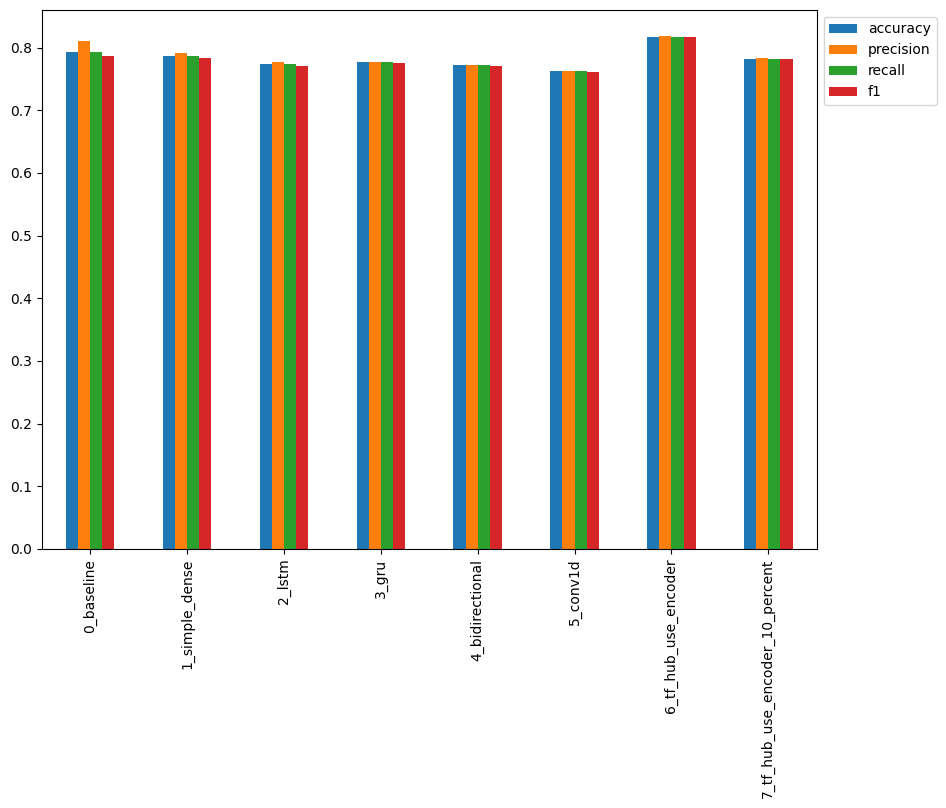

In [ ]:
# Plot
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

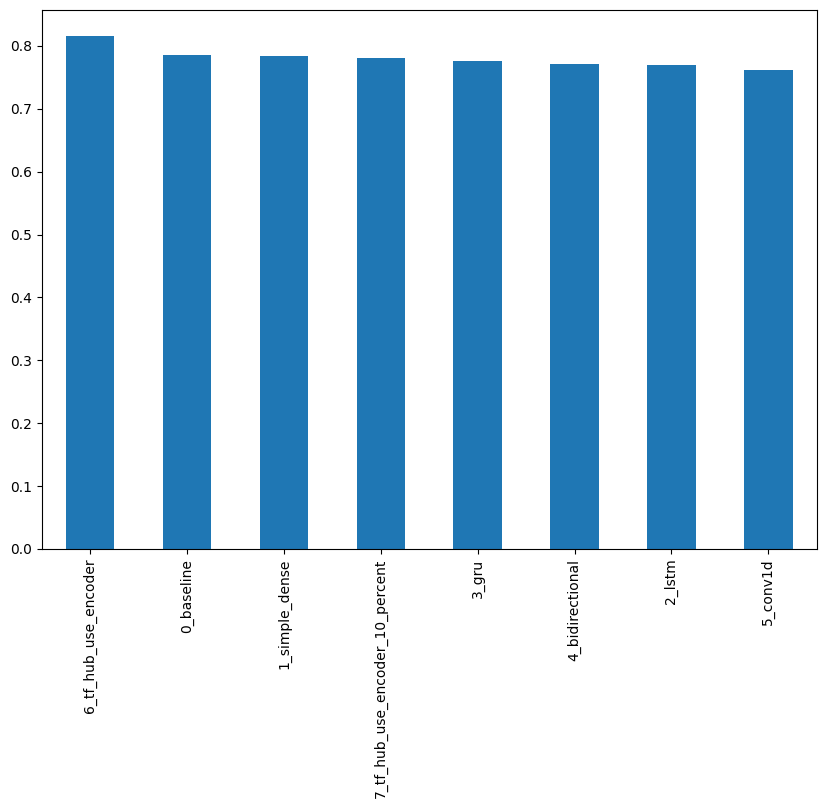

In [ ]:
# Sort by f1-score
all_model_results.sort_values("f1", ascending=False)["f1"].plot(kind="bar", figsize=(10, 7));

## Finding the most wrong examples


In [ ]:
# Download
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2025-01-20 16:19:40--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.207, 74.125.200.207, 74.125.130.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M  23.1MB/s    in 44s     

2025-01-20 16:20:24 (21.0 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables

In [ ]:
# Import
import tf_keras as k3
model_6_pretrained = k3.models.load_model("08_model_6_USE_feature_extractor")
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 8ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723336815834045, 0.8162729740142822]

In [ ]:
# Make predictions
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_preds = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_preds[:10] # these should be in label format

24/24 [==============================] - 1s 8ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Create DataFrame with validation sentences, validation labels and best performing model prediction labels + probabilities
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_pretrained_preds,
                       "pred_prob": tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,b'DFR EP016 Monthly Meltdown - On Dnbheaven 20...,0.0,0.0,0.159811
1,b'FedEx no longer to transport bioterror germs...,0.0,1.0,0.747275
2,b'Gunmen kill four in El Salvador bus attack: ...,1.0,1.0,0.988757
3,b'@camilacabello97 Internally and externally s...,1.0,0.0,0.196266
4,b'Radiation emergency #preparedness starts wit...,1.0,1.0,0.707680


In [ ]:
# Find the wrong prediction
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10] # these are false positives

,text,target,pred,pred_prob
31,b'? High Skies - Burning Buildings ? http://t....,0.0,1.0,0.910274
759,b'FedEx will no longer transport bioterror pat...,0.0,1.0,0.876961
628,"b""@noah_anyname That's where the concentration...",0.0,1.0,0.852340
209,b'Ashes 2015: Australia\xc2\x89\xc3\x9b\xc2\xa...,0.0,1.0,0.835610
251,b'@AshGhebranious civil rights continued in th...,0.0,1.0,0.827304
393,b'@SonofLiberty357 all illuminated by the brig...,0.0,1.0,0.814794
109,b'[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES...,0.0,1.0,0.811066
49,b'@madonnamking RSPCA site multiple 7 story hi...,0.0,1.0,0.803137
119,b'@freefromwolves GodsLove &amp; #thankU broth...,0.0,1.0,0.766990
344,b'Air Group is here to the rescue! We have 24/...,0.0,1.0,0.766887


In [ ]:
most_wrong.tail() # these are false negatives

,text,target,pred,pred_prob
411,"b""@SoonerMagic_ I mean I'm a fan but I don't n...",1.0,0.0,0.043936
233,b'I get to smoke my shit in peace',1.0,0.0,0.042155
38,b'Why are you deluged with low self-image? Tak...,1.0,0.0,0.039018
244,b'Reddit Will Now Quarantine\xc2\x89\xc3\x9b_ ...,1.0,0.0,0.038970
23,"b""Ron &amp; Fez - Dave's High School Crush htt...",1.0,0.0,0.037175


In [ ]:
# Check the false positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 0.0, Pred: 1.0, Prob: 0.9102736115455627
Text:
b'? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying'

----

Target: 0.0, Pred: 1.0, Prob: 0.8769606351852417
Text:
b'FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J'

----

Target: 0.0, Pred: 1.0, Prob: 0.852339506149292
Text:
b"@noah_anyname That's where the concentration camps and mass murder come in. \n \nEVERY. FUCKING. TIME."

----

Target: 0.0, Pred: 1.0, Prob: 0.8356096148490906
Text:
b'Ashes 2015: Australia\xc2\x89\xc3\x9b\xc2\xaas collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0'

----

Target: 0.0, Pred: 1.0, Prob: 0.8273041844367981
Text:
b'@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.'

----

Target: 0.0, Pred: 1.0, Prob: 0.8147935271263123
Text:
b'@SonofLiberty357 all illuminated by the b

In [ ]:
# Check the false negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"Target: {target}, Pred: {pred}, Prob: {pred_prob}")
  print(f"Text:\n{text}\n")
  print("----\n")

Target: 1.0, Pred: 0.0, Prob: 0.0673232451081276
Text:
b'@DavidVonderhaar At least you were sincere ??'

----

Target: 1.0, Pred: 0.0, Prob: 0.05505065247416496
Text:
b'@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu'

----

Target: 1.0, Pred: 0.0, Prob: 0.05461452156305313
Text:
b"Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets"

----

Target: 1.0, Pred: 0.0, Prob: 0.054608482867479324
Text:
b'going to redo my nails and watch behind the scenes of desolation of smaug ayyy'

----

Target: 1.0, Pred: 0.0, Prob: 0.04962707310914993
Text:
b"You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you."

----

Target: 1.0, Pred: 0.0, Prob: 0.04393618181347847
Text:
b"@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren"

----

Ta

## Making predictions on the test dataset

In [ ]:
# Making predictions on the test dataset and visualizing them
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample])) # our model expects a list as input
  pred = tf.round(pred_prob)
  print(f"Pred: {int(pred)}, Prob: {pred_prob}")
  print(f"Text:\n{test_sample}\n")
  print("-----\n")

1/1 [==============================] - 0s 42ms/step
Pred: 1, Prob: 0.9753750562667847
Text:
Fears over missing migrants in Med: Rescuers search for survivors after a boat carrying as many as 600 migrantsÛ_ http://t.co/UUHNC8ZkOW

-----

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.1596280336380005
Text:
@SheriffClarke @FreeAmerican100 If a carpenter built your house and it collapsed would you ask the same carpenter to rebuild it?

-----

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.36024749279022217
Text:
@FoxNews my father's mother survived it. Never met her.

-----

1/1 [==============================] - 0s 44ms/step
Pred: 0, Prob: 0.29987406730651855
Text:
If Oikawa was in Karasuno I guess I'd just collapse from such an overwhelming happiness.

-----

1/1 [==============================] - 0s 42ms/step
Pred: 0, Prob: 0.03433859348297119
Text:
You da One 

#MTVSummerStar #VideoVeranoMTV  #MTVHottest Britney Spears Lana Del Rey

-----



## The speed/score tradeoff

In [ ]:
# Let's make a function to measure the time of prediction
import time
def pred_timer(model, samples):
  """
  Times how long a model takes to make predictions on samples.
  """
  start_time = time.perf_counter() # get start time
  model.predict(samples) # make predictions
  end_time = time.perf_counter() # get finish time
  total_time = end_time-start_time # calculuate how long predictons took to make
  time_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculate TF Hub Sentence Encoder time per pred
model_6_total_pred_time, model_6_time_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_time_per_pred

24/24 [==============================] - 0s 8ms/step


(0.25744867999992493, 0.00033785916010488836)

In [ ]:
# Calculate our baseline model times per pred
baseline_total_pred_time, baseline_time_per_pred = pred_timer(model_0, val_sentences.numpy())
baseline_total_pred_time, baseline_time_per_pred

(0.013169171000299684, 1.7282376640813235e-05)

In [ ]:
# Get results for pretrained GS model
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_pred=model_6_pretrained_preds)
model_6_pretrained_results

{'accuracy': 81.62729658792651,
 'precision': 0.818446310697231,
 'recall': 0.8162729658792651,
 'f1': 0.8148082644367335}

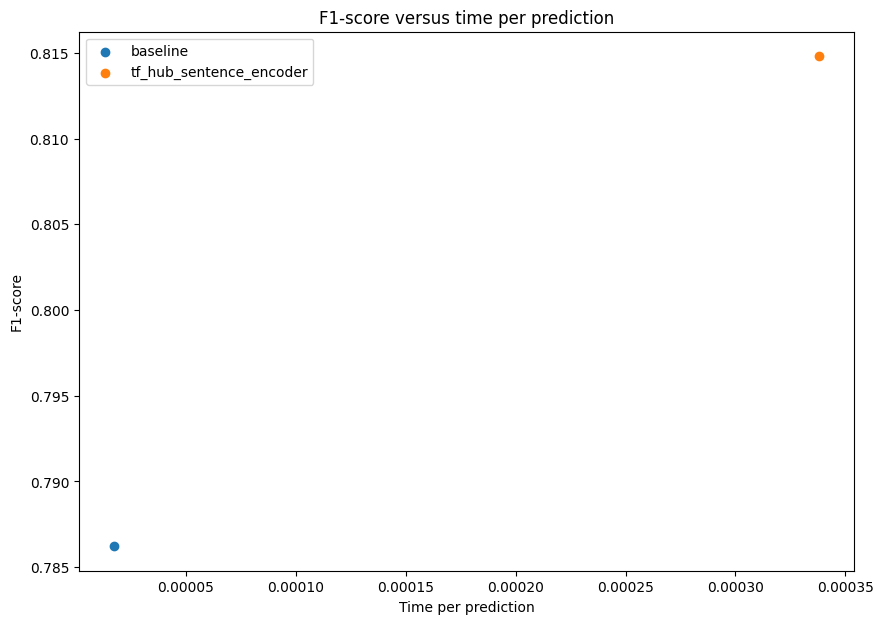

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(baseline_time_per_pred, baseline_results["f1"], label="baseline")
plt.scatter(model_6_time_per_pred, model_6_pretrained_results["f1"], label="tf_hub_sentence_encoder")
plt.legend()
plt.title("F1-score versus time per prediction")
plt.xlabel("Time per prediction")
plt.ylabel("F1-score");

> 📖 **Resource:** See all course materials as well as exercises and extra-curriculum for this notebook on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning